In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [5]:
product_data = pd.read_csv('dataset/product.csv')
customer_data = pd.read_csv('dataset/customer.csv')
order_data = pd.read_csv('dataset/order.csv')
date_data = pd.read_csv('dataset/date.csv')
employee_data = pd.read_csv('dataset/employee.csv')
gift_data = pd.read_csv('dataset/gift.csv')
order_item = pd.read_csv('dataset/order_item.csv')
review_data = pd.read_csv('dataset/review.csv')
department_data = pd.read_csv('dataset/department.csv')
gift_exchange_data = pd.read_csv('dataset/gift_exchange.csv')

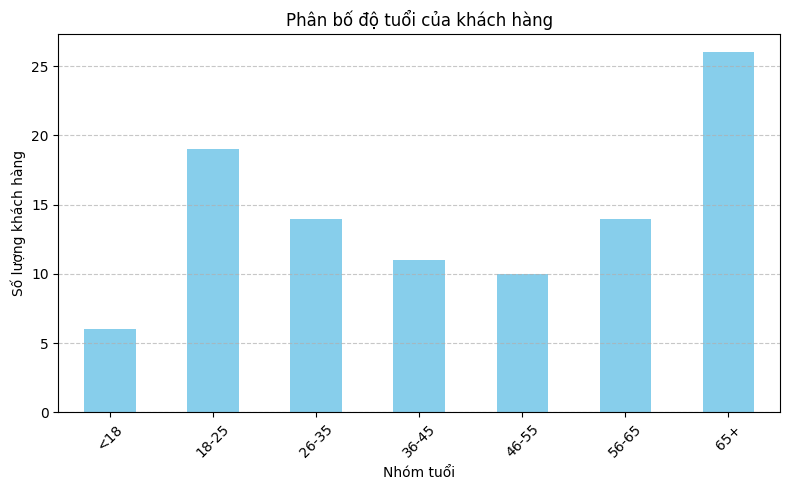

In [ ]:
# 1. Phân tích hành vi khách hàng

# Chuyển ngày sinh thành datetime
customer_data['DOB'] = pd.to_datetime(customer_data['DOB'], errors='coerce')
customer_data['customer_since'] = pd.to_datetime(customer_data['customer_since'], errors='coerce')

# Tính toán độ tuổi của khách hàng
current_date = pd.to_datetime('now')
customer_data['age'] = (current_date - customer_data['DOB']).dt.days // 365

# Phân đoạn nhóm tuổi
age_bins = [0, 18, 25, 35, 45, 55, 65, np.inf]
age_labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+']

customer_data['age_group'] = pd.cut(customer_data['age'], bins=age_bins, labels=age_labels,include_lowest=True ,right=False)

# Vẽ biểu đồ phân bố độ tuổi của khách hàng
plt.figure(figsize=(8,5))
customer_data['age_group'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Phân bố độ tuổi của khách hàng')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Số lượng khách hàng')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

age_group
<18      0.000000
18-25    0.000000
26-35    0.000000
36-45    0.000000
46-55    0.000000
56-65    9.357143
65+      0.000000
Name: point, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_21512\1422867785.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_point = customer_data.groupby('age_group')['point'].mean()


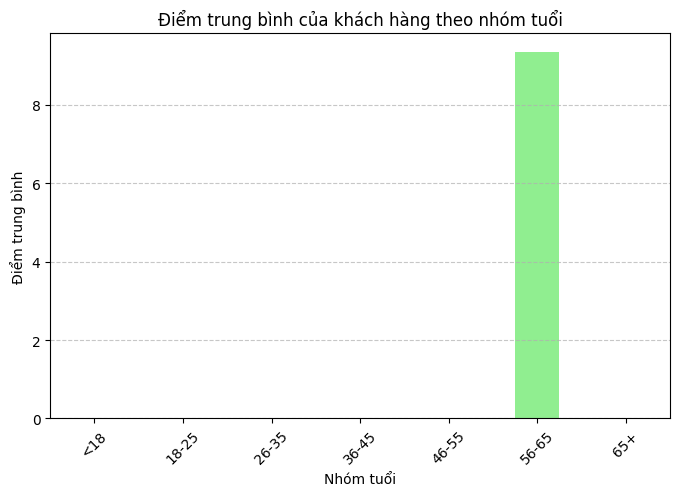

In [25]:
# Tính điểm trung bình của khách hàng theo nhóm tuổi
age_point = customer_data.groupby('age_group')['point'].mean()
print(age_point)

# Vẽ biểu đồ điểm trung bình của khách hàng theo nhóm tuổi
plt.figure(figsize=(8,5))
age_point.plot(kind='bar', color='lightgreen')
plt.title('Điểm trung bình của khách hàng theo nhóm tuổi')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Điểm trung bình')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout
plt.show()


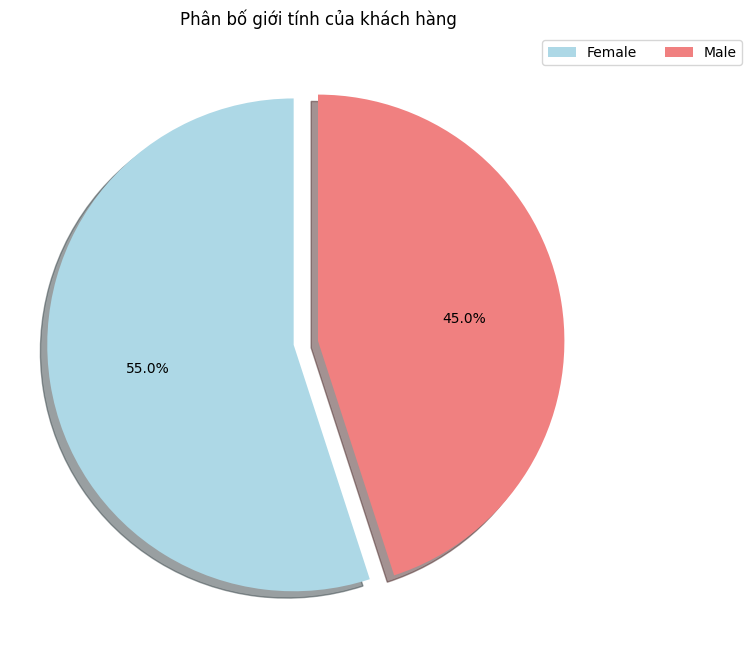

In [55]:
# Phân đoạn theo giới tính

# Vẽ biểu đồ phân bố giới tính của khách hàng dưới dạng biểu đồ tròn với chú thích
plt.figure(figsize=(8, 8))
gender_counts = customer_data['gender'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, labels = ['',''], colors=['lightblue', 'lightcoral'], shadow=True, explode=(0.1, 0))
plt.title('Phân bố giới tính của khách hàng')
plt.ylabel('')
plt.legend(labels =['Female', 'Male'], loc='best', bbox_to_anchor=(1.2, 1), ncol = 2)
plt.show()




In [58]:
# Tính điểm trung bình của khách hàng theo giới tính
gender_avg_point = customer_data.groupby('gender')['point'].mean()
print(gender_avg_point)


gender
F    2.911111
M    0.000000
Name: point, dtype: float64
